In [3]:
from collections import defaultdict
import pandas
trainDict = defaultdict(list)
trainDF = pandas.read_table('../dblp-ref/4fold/4fold_0_train.tsv',
                             usecols=[0, 1, 2],
                             names=['user', 'ref', 'cites'],
                             na_filter=False)
for index, row in trainDF.iterrows():
    trainDict[row['user']].append(row['ref'])

In [4]:
popularDict = defaultdict(int)
for index, row in trainDF.iterrows():
    popularDict[row['ref']]+=1

In [5]:
popularDict

defaultdict(int,
            {241938: 1,
             740203: 1,
             744868: 1,
             256846: 1,
             2922123: 1,
             817737: 1,
             1924513: 1,
             1959644: 1,
             1152971: 1,
             2132413: 1,
             1242685: 1,
             1322702: 1,
             2582776: 1,
             1335588: 1,
             2352216: 1,
             2586714: 1,
             1735454: 1,
             955702: 1,
             1478: 1,
             2116697: 1,
             32976: 1,
             2859554: 1,
             2928730: 1,
             460955: 1,
             1523356: 2,
             2890007: 3,
             1122284: 1,
             2850441: 1,
             2466293: 1,
             2845970: 1,
             2823582: 1,
             956182: 1,
             410208: 1,
             1390898: 1,
             2875649: 1,
             1529519: 1,
             504374: 1,
             566845: 301,
             1001035: 1,
             2143384: 

In [7]:
import operator
sorted_popular = sorted(popularDict.items(), key=operator.itemgetter(1))
sorted_popular.reverse()

In [9]:
sorted_popular[:10]

[(2458466, 336),
 (566845, 301),
 (2358174, 242),
 (2716671, 239),
 (2332760, 229),
 (337046, 208),
 (1789325, 200),
 (2442067, 195),
 (2570279, 175),
 (2381049, 172)]

In [10]:
testDF = pandas.read_table('../dblp-ref/4fold/4fold_test.tsv',
                             usecols=[0, 1, 2],
                             names=['user', 'ref', 'cites'],
                             na_filter=False)
testDict = defaultdict(list)
for index, row in testDF.iterrows():
    testDict[row['user']].append(row['ref'])

In [30]:
testDict

defaultdict(list,
            {3019852: [1820911, 2329350, 713984, 2358174, 2550443],
             3034149: [1145575, 2148130, 982788, 834788],
             3067323: [2060698],
             3050761: [134774, 2722156],
             3018581: [2695465, 2224644, 203377],
             3070721: [1842241],
             3052802: [2820386, 944860, 403051],
             3031031: [2540636, 813165, 638369],
             3015029: [328545, 352553],
             3015801: [217139],
             3026212: [1249998, 1512963, 1172150],
             3065039: [784472, 657795],
             3004108: [196935, 2989203, 2821919, 2200094],
             3015880: [626556],
             3066796: [2570279, 2909574, 2772740],
             3014851: [1630087],
             3039930: [446686, 936526],
             3034256: [1824913],
             3036998: [2472400],
             3053655: [974986, 207992, 2173363, 2243198],
             3017207: [2281407,
              1105408,
              1101573,
              2137192

In [11]:
validDF = pandas.read_table('../dblp-ref/4fold/4fold_0_val.tsv',
                             usecols=[0, 1, 2],
                             names=['user', 'ref', 'cites'],
                             na_filter=False)
validDict = defaultdict(list)
for index, row in validDF.iterrows():
    validDict[row['user']].append(row['ref'])

In [53]:
import numpy as np
precisions_val = []
recalls_val = []
f1_val = []
klist = list(range(1,51))
for k in klist:
    
    precisions, recalls = [], []
    
    for key, value in validDict.items():
        n_rel = len(value)
        train_for_key = trainDict[key]
        save = [] 
        for ref, num_cites in sorted_popular[:100]:
            if not ref in train_for_key:
                save.append(ref)
        recommendations = save[:k]
        n_rec_k = len(recommendations)
        n_rel_and_rec_k = 0
        for each in value:
            if each in recommendations:
                n_rel_and_rec_k += 1
        precisions.append( n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0 )
        recalls.append( n_rel_and_rec_k / n_rel if n_rel != 0 else 0 )
    precision=np.sum(precisions)/len(precisions)
    recall=np.sum(recalls)/len(recalls)
    precisions_val.append(precision) 
    recalls_val.append(recall) 
    f1_val.append(2*(precision*recall)/(precision+recall)) 

In [55]:
precisions_test = []
recalls_test = []
f1_test = []
for k in klist:
    
    precisions, recalls = [], []
    
    for key, value in testDict.items():
        n_rel = len(value)
        train_for_key = trainDict[key]
        save = [] 
        for ref, num_cites in sorted_popular[:50]:
            if not ref in train_for_key:
                save.append(ref)
        recommendations = save[:k]
        n_rec_k = len(recommendations)
        n_rel_and_rec_k = 0
        for each in value:
            if each in recommendations:
                n_rel_and_rec_k += 1
        precisions.append( n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0 )
        recalls.append( n_rel_and_rec_k / n_rel if n_rel != 0 else 0 )
    precision=np.sum(precisions)/len(precisions)
    recall=np.sum(recalls)/len(recalls)
    precisions_test.append(precision) 
    recalls_test.append(recall) 
    f1_test.append(2*(precision*recall)/(precision+recall)) 

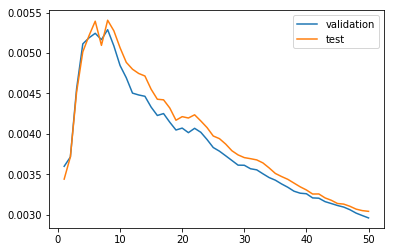

In [56]:
plt.plot(klist, f1_val, label="validation")
plt.plot(klist, f1_test, label="test")
plt.legend()
plt.show()

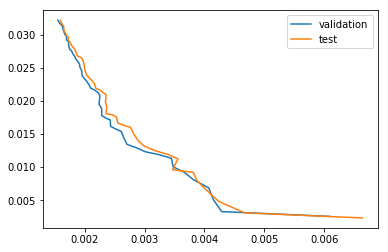

In [57]:
plt.plot(precisions_val, recalls_val, label="validation")
plt.plot(precisions_test, recalls_test, label="test")
plt.legend()
plt.show()

In [58]:
f1_val

[0.0036005594065489505,
 0.0037151926186627104,
 0.00455843828834764,
 0.005112627547705582,
 0.00518736076496459,
 0.00524348972917869,
 0.00516472039969695,
 0.005287945529033249,
 0.00508743583461132,
 0.00484530373062533,
 0.004694041557492536,
 0.004504710106930419,
 0.004481652827933891,
 0.004465394535236576,
 0.004331713192080622,
 0.004228249285593427,
 0.00425182947937773,
 0.004145278173012694,
 0.004048815965935081,
 0.004072620407927371,
 0.004016266464344131,
 0.0040698127822894805,
 0.004020593775521417,
 0.0039314683571663265,
 0.0038324693846862926,
 0.0037873290570068943,
 0.003730528666785939,
 0.0036729105701162213,
 0.0036149480252858765,
 0.0036134713775280354,
 0.0035704396423711,
 0.0035568614347926187,
 0.0035080967253037706,
 0.0034614481492489806,
 0.003429115993095291,
 0.0033828116515326506,
 0.0033419988912472,
 0.00329315292527629,
 0.003268470155454541,
 0.0032616516388301944,
 0.0032102805777028975,
 0.003206707428600821,
 0.0031643926150968574,
 0.0031

In [59]:
f1_test

[0.0034421413501165856,
 0.0037171451933454332,
 0.0045168144491181065,
 0.005014405931027949,
 0.00521381546806363,
 0.00539279872571101,
 0.005094403235411283,
 0.005404643787967354,
 0.0052740558753956125,
 0.005064680257920483,
 0.004884432808773551,
 0.004799824219348591,
 0.004747132409094749,
 0.0047160410724628385,
 0.004552328498881431,
 0.004428854102417127,
 0.004421735772870702,
 0.004320996258160123,
 0.00416955447076258,
 0.004213914849890405,
 0.004197124124475474,
 0.004236721752017982,
 0.004160504536574128,
 0.004079024261292732,
 0.003975027567058496,
 0.00394208544021904,
 0.003875357634900711,
 0.0037930343915898042,
 0.003741362994371867,
 0.003708031111753904,
 0.003694757210329524,
 0.003679737750277939,
 0.003642348122237069,
 0.003580462732664389,
 0.0035123400917054346,
 0.003474129521760217,
 0.0034398963971443647,
 0.0033933482758052814,
 0.003347000634505776,
 0.0033083234916605124,
 0.003258152608763282,
 0.003259081009457399,
 0.003210361692456417,
 0.00

In [61]:
#Discovery ratio
precisions_test = []
recalls_test = []
f1_test = []
k = 8
    
numerator, denominator = 0, 0
    
for key, value in testDict.items():
    n_rel = len(value)
    train_for_key = trainDict[key]
    save = [] 
    for ref, num_cites in sorted_popular[:50]:
        if not ref in train_for_key:
            save.append(ref)
    recommendations = save[:k]
    n_rec_k = len(recommendations)
    n_rel_and_rec_k = 0
    for each in value:
        if each in recommendations:
            n_rel_and_rec_k += 1
    numerator += n_rec_k - n_rel_and_rec_k
    denominator += n_rec_k
print(numerator/denominator)

0.9964427567543974
